In [1]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Load datasets

train_df = pd.read_csv(r"NSL-KDD Dataset (filtered, not original version)/KDDTrain_filtered.csv")
test_df = pd.read_csv(r"NSL-KDD Dataset (filtered, not original version)/KDDTest_filtered.csv")

# label transformation to Binary labels: normal=0, attack = 1
train_df['binary_label'] = train_df['label'].apply(
    lambda x: 0 if x == 'normal' else 1
)
test_df['binary_label'] = test_df['label'].apply(
    lambda x: 0 if x == 'normal' else 1
)


In [3]:
# Features and target
X_train = train_df.drop(columns=['label', 'binary_label'])
y_train = train_df['binary_label']

X_test = test_df.drop(columns=['label', 'binary_label'])
y_test = test_df['binary_label']

# Identify column types
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X_train.select_dtypes(exclude=["object"]).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

In [4]:
# Features and target
X_train = train_df.drop(columns=['label', 'binary_label'])
y_train = train_df['binary_label']

X_test = test_df.drop(columns=['label', 'binary_label'])
y_test = test_df['binary_label']

# Identify column types
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X_train.select_dtypes(exclude=["object"]).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

In [5]:
# Logistic Regression model
log_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",  # IMPORTANT pour IDS
    random_state=42
)

log_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", log_model)
])


In [6]:
# Train
log_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transform

In [7]:
# Predict
y_pred_log = log_pipeline.predict(X_test)

In [8]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

In [9]:
print("accuracy : ",accuracy, "\n")
print("confusion matrix \n",conf_matrix)
print("\n classification report :\n",class_report)

accuracy :  0.8097274184927846 

confusion matrix 
 [[8807  760]
 [2800 6343]]

 classification report :
               precision    recall  f1-score   support

           0       0.76      0.92      0.83      9567
           1       0.89      0.69      0.78      9143

    accuracy                           0.81     18710
   macro avg       0.83      0.81      0.81     18710
weighted avg       0.82      0.81      0.81     18710



*MODEL VISUALISATION*

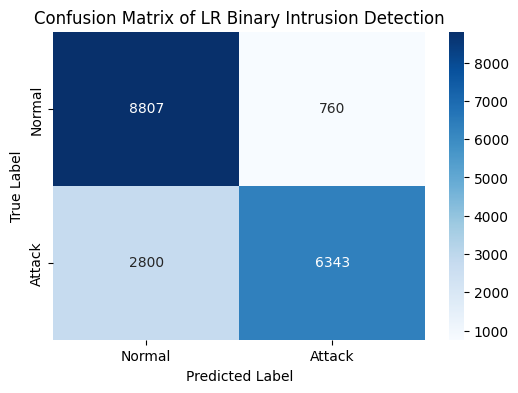

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Attack"],
            yticklabels=["Normal", "Attack"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of LR Binary Intrusion Detection")
plt.show()

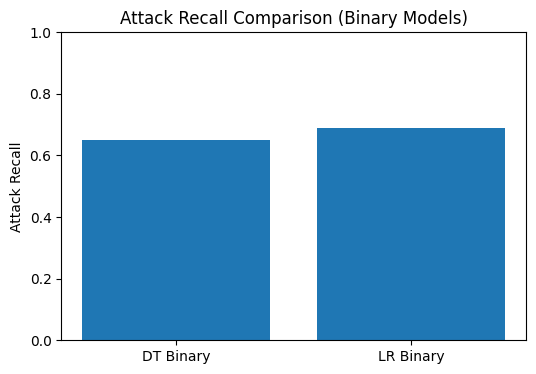

In [11]:
models = ["DT Binary", "LR Binary"]
attack_recall = [0.65, 0.69]  # From classification reports

plt.figure(figsize=(6, 4))
plt.bar(models, attack_recall)
plt.ylabel("Attack Recall")
plt.title("Attack Recall Comparison (Binary Models)")
plt.ylim(0, 1)
plt.show()
